### Step 1 : Data Ingestion

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


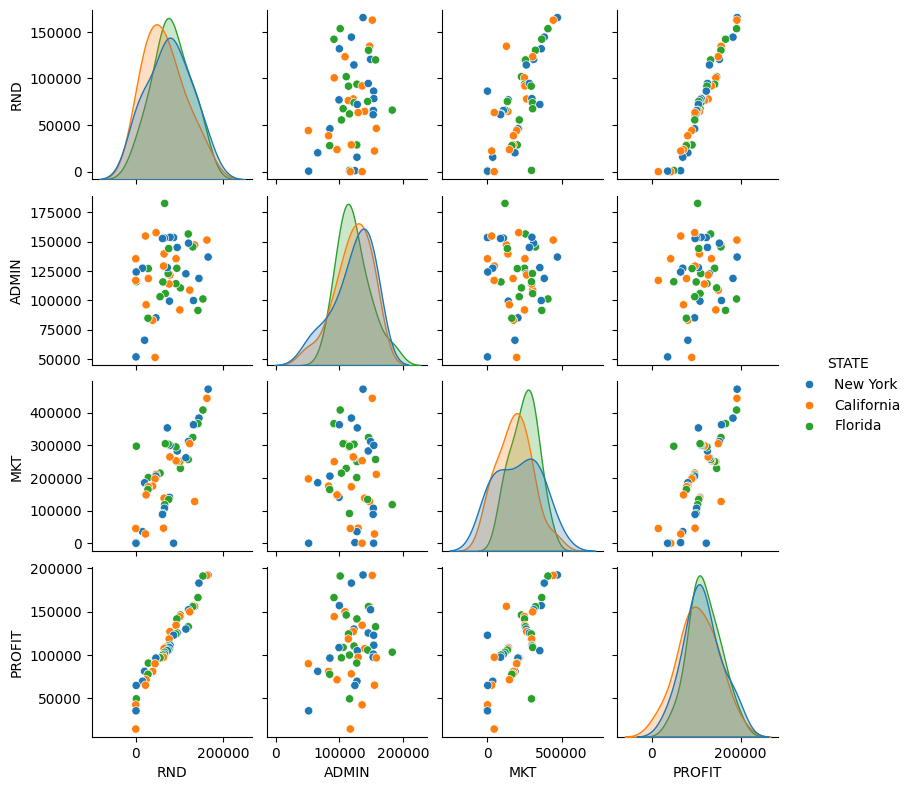

In [17]:
import seaborn as sns
sns.pairplot(df, hue="STATE", height=2)

### Step 2 : Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

### Step 3 : Saperate X and Y

In [5]:
X = df[["RND"]]
Y = df[["PROFIT"]]

In [6]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [7]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 4 : Build a model

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=21, test_size=0.3)

In [9]:
xtrain.head()

,RND
33,55493.95
0,165349.20
13,91992.39
28,66051.52
49,0.00


In [10]:
xtest.head()

,RND
7,130298.13
44,22177.74
43,15505.73
25,64664.71
14,119943.24


In [11]:
ytrain.head()

,PROFIT
33,96778.92
0,192261.83
13,134307.35
28,103282.38
49,14681.40


In [12]:
ytest.head()

,PROFIT
7,155752.60
44,65200.33
43,69758.98
25,107404.34
14,132602.65


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [21]:
B0 = model.intercept_
B0

array([49585.97930509])

In [22]:
B1 = model.coef_
B1

array([[0.85336607]])

### Step 5 : Model evaluation

In [33]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error


In [36]:
def eval_model(model, x, y):
    ypred = model.predict(x)

    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    
    print(f"RMSE = {rmse:.2f}")
    print(f"MAE = {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 = {r2:.2%}")

In [37]:
eval_model(model, X, Y)

RMSE = 9238.93
MAE = 6946.19
MAPE : 11.20%
R2 = 94.64%


<Axes: xlabel='RND', ylabel='PROFIT'>

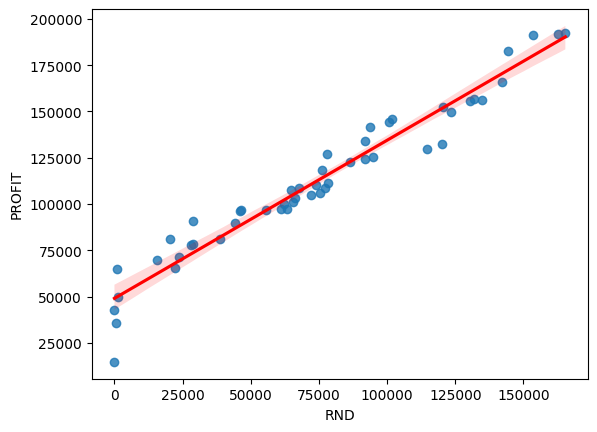

In [41]:
sns.regplot(x="RND", y = "PROFIT", data=df, line_kws={"color": "red"})

### Step 6 : Out of sample prediction

In [42]:
rnd = 175000

In [43]:
prediction = model.predict([[rnd]])
prediction


array([[198925.0418455]])